In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
plt.rcParams['font.family']='SimHei'

In [2]:
df = pd.read_csv(r'e:/datas/creditcardfraud.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [3]:
df.head().append(df.tail())

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [4]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

(-1.1007315310553123,
 1.100034835096324,
 -1.1011032945940593,
 1.1004213321398626)

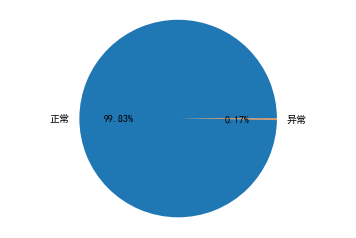

In [5]:
labels = ['正常','异常']
plt.pie(df['Class'].value_counts().values,labels=labels,autopct='%.2f%%',)
plt.axis('equal')

In [6]:
# 探索交易时间
# 正常交易时间
df.query('Class==0')['Time'].describe()

count    284315.000000
mean      94838.202258
std       47484.015786
min           0.000000
25%       54230.000000
50%       84711.000000
75%      139333.000000
max      172792.000000
Name: Time, dtype: float64

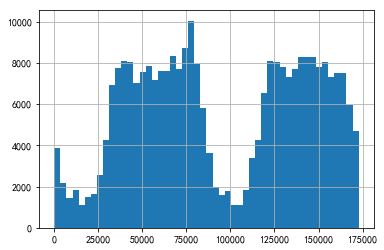

In [7]:
# 正常交易时间分布
df.query('Class==0')['Time'].hist(bins=50)

In [8]:
# 异常交易时间
df.query('Class==1')['Time'].describe()

count       492.000000
mean      80746.806911
std       47835.365138
min         406.000000
25%       41241.500000
50%       75568.500000
75%      128483.000000
max      170348.000000
Name: Time, dtype: float64

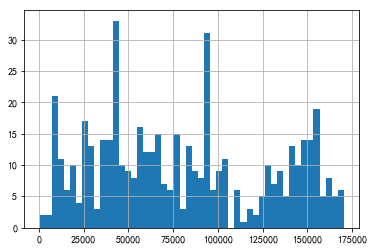

In [9]:
# 异常交易时间分布
df.query('Class==1')['Time'].hist(bins=50)

In [10]:
# 正常交易金额
df.query('Class==0')['Amount'].describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

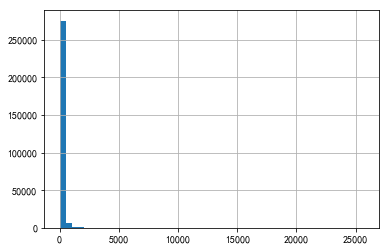

In [11]:
# 正常交易金额分布
df.query('Class==0')['Amount'].hist(bins=50)

In [12]:
# 异常交易金额
df.query('Class==1')['Amount'].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

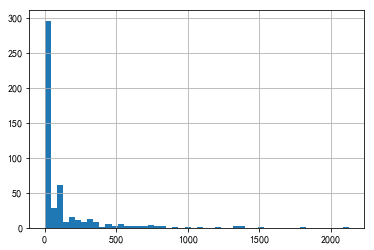

In [13]:
# 异常交易金额分布
df.query('Class==1')['Amount'].hist(bins=50)

### 数据预处理

In [14]:
# 由于Amount这一列数据取值范围与其他列相差较大，所以需要先对该列进行标准化处理
from sklearn.preprocessing import StandardScaler
df['normAmount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1,1))
print('未标准化的Amount：',df['Amount'].values.reshape(-1,1))
print('标准化的Amount：',df['normAmount'])

未标准化的Amount： [[149.62]
 [  2.69]
 [378.66]
 ...
 [ 67.88]
 [ 10.  ]
 [217.  ]]
标准化的Amount： 0         0.244964
1        -0.342475
2         1.160686
3         0.140534
4        -0.073403
5        -0.338556
6        -0.333279
7        -0.190107
8         0.019392
9        -0.338516
10       -0.322044
11       -0.313289
12        0.132538
13       -0.243282
14       -0.118142
15       -0.289300
16       -0.301294
17       -0.349671
18       -0.166119
19       -0.333239
20        0.573167
21       -0.216935
22       -0.344114
23       -0.262273
24       -0.349671
25       -0.247560
26       -0.185790
27       -0.289260
28       -0.221293
29       -0.301294
            ...   
284777   -0.349231
284778   -0.033382
284779   -0.253277
284780   -0.233287
284781   -0.301254
284782   -0.301974
284783   -0.307411
284784   -0.193306
284785   -0.346073
284786   -0.317447
284787   -0.313289
284788   -0.337277
284789   -0.111345
284790   -0.314008
284791   -0.271988
284792   -0.337277
284793   -0.3332

In [15]:
df.drop(['Time','Amount'],axis=1,inplace=True)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


#### SMOTE平衡样本

In [16]:
x = np.array(df.loc[:,df.columns!='Class'])
y = np.array(df.loc[:,df.columns=='Class'])
print(x.shape)
print(y.shape)

(284807, 29)
(284807, 1)


In [17]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [18]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)
print('训练集交易记录数：',x_train.shape[0])
print('测试集交易记录数：',x_test.shape[0])
print('交易记录总数：',x_train.shape[0]+x_test.shape[0])
print('上采样前，类别1共{}个，类别0共{}个'.format(sum(y_train==1),sum(y_train==0)))

训练集交易记录数： 199364
测试集交易记录数： 85443
交易记录总数： 284807
上采样前，类别1共[345]个，类别0共[199019]个


In [19]:
# 对训练集进行上采样
smote = SMOTE(random_state=2)
x_train_os,y_train_os = smote.fit_sample(x_train,y_train.ravel())
print('上采样后交易记录数：',x_train_os.shape[0])
print('交易记录总数：',x_train_os.shape[0]+x_test.shape[0])
print('上采样后，类别1共{}个，类别0共{}个'.format(sum(y_train_os==1),sum(y_train_os==0)))

上采样后交易记录数： 398038
交易记录总数： 483481
上采样后，类别1共199019个，类别0共199019个


### 建模与评估

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
model = LogisticRegression()
model.fit(x_train_os,y_train_os)

E:\ANACONDA\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
y_predict = model.predict(x_test)

In [23]:
y_predict[:10]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [24]:
# 准确率
(y_predict.reshape(-1,1) == y_test).mean()

0.9752466556651803

In [29]:
# 召回率
((y_predict.reshape(-1,1)==1)*(y_test==1)).sum()/(y_test==1).sum()

0.9183673469387755

### 没有做样本平衡处理

In [30]:
model2 = LogisticRegression()
model2.fit(x_train,y_train)

E:\ANACONDA\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
y_predict2 = model2.predict(x_test)

In [32]:
# 准确率
(y_predict2.reshape(-1,1) == y_test).mean()

0.999204147794436

In [33]:
# 召回率
((y_predict2.reshape(-1,1)==1)*(y_test==1)).sum()/(y_test==1).sum()

0.6190476190476191

> 可以明显看出，如果不做样本平衡处理，训练出的模型很难从异常交易数据中提取规律，因此召回率很低